## Census Income dataset.

I have downloaded this dataset from UCI machine learning repository(http://mlr.cs.umass.edu/ml/datasets/Census+Income). Here,we have salary as a target variable against all the aspects or features of the individuals.I am going to use Classification approach to solve this problem using machine Learning Algorithm.

I am going to import numpy and pandas for data operations,pyplot from the subpackages of matplotlib and seaborn library for data visualization and sklearn for data process for machine learning and metrics.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the downloaded data from the file folder and putting back to the dataframe.
ad=pd.read_csv('C:/Users/hp/Downloads/Github/Adult dataset/adult.csv',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital_gain','capital_loss','hrs/week','native','salary'])
sal=pd.DataFrame(ad)

#getting the structural view of data
sal.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs/week,native,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#checking for the shape
sal.shape

(32561, 15)

Checking for any null values in the dataset

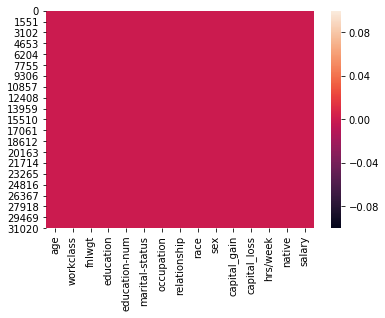

In [4]:
#checking for any null values using heatmap
sns.heatmap(sal.isnull())
#so it shows there is no null values in the dataset

In [5]:
#getting all info of the columns
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hrs/week          32561 non-null int64
native            32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#getting the unique value counts for  each column
for col in sal.columns:
    print(sal[col].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

As we see from unique value counts,we have Education column shows the qualification of the person.So education-num is not needed,'race' column is no use to predict the salary.'capital_gain' and 'capital_loss' is bussiness term used when sales or profit-loss matters.
So I am going to drop these four features from my dataset.

In [7]:
sal.drop(['education-num','race','capital_gain','capital_loss'],axis=1,inplace=True)

Data Visualization

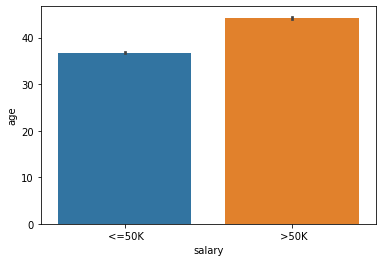

In [8]:
#plotting the barplot for salary vs age
sns.barplot(x='salary',y='age',data=sal)

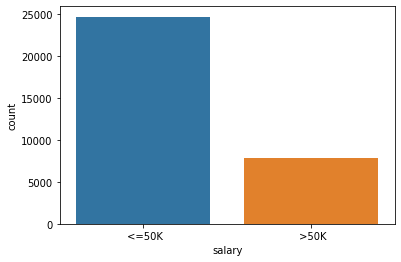

In [9]:
sns.countplot(sal['salary'])
#this graph shows most of the person has salary less than or equal to 50k

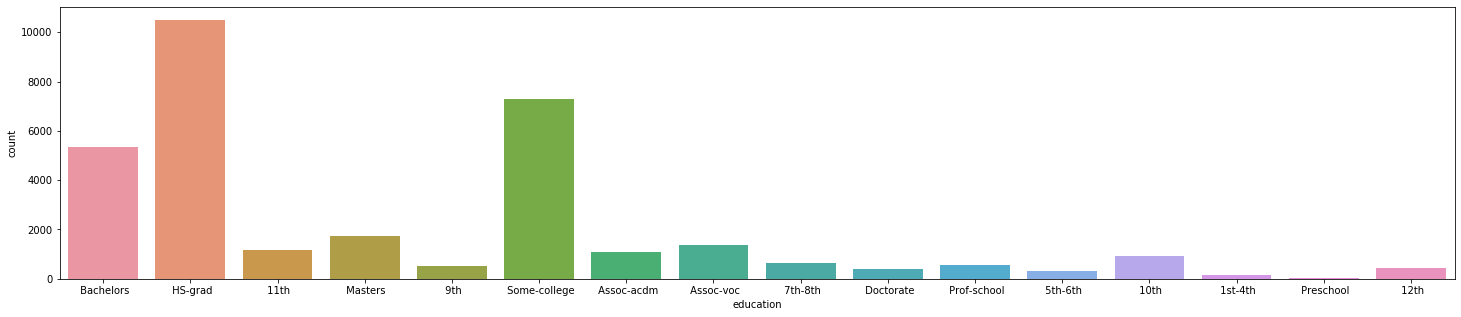

In [10]:
#plotting the barplot for salary vs education
plt.figure(figsize=(25,5))
sns.countplot(sal['education'])

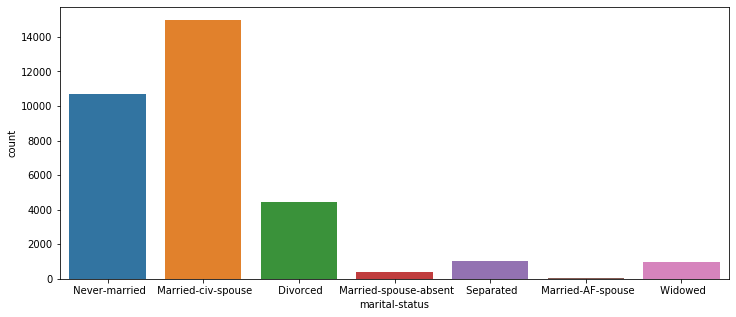

In [11]:
#lets take the count for marital status
plt.figure(figsize=(12,5))
sns.countplot(sal['marital-status'])

Now,convert the categorical columns into the term of sorted labels using LabelEncoder from sklearn.preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['workclass','education','marital-status','occupation','relationship','sex','native','salary']
for val in list:
    sal[val]=le.fit_transform(sal[val].astype(str))

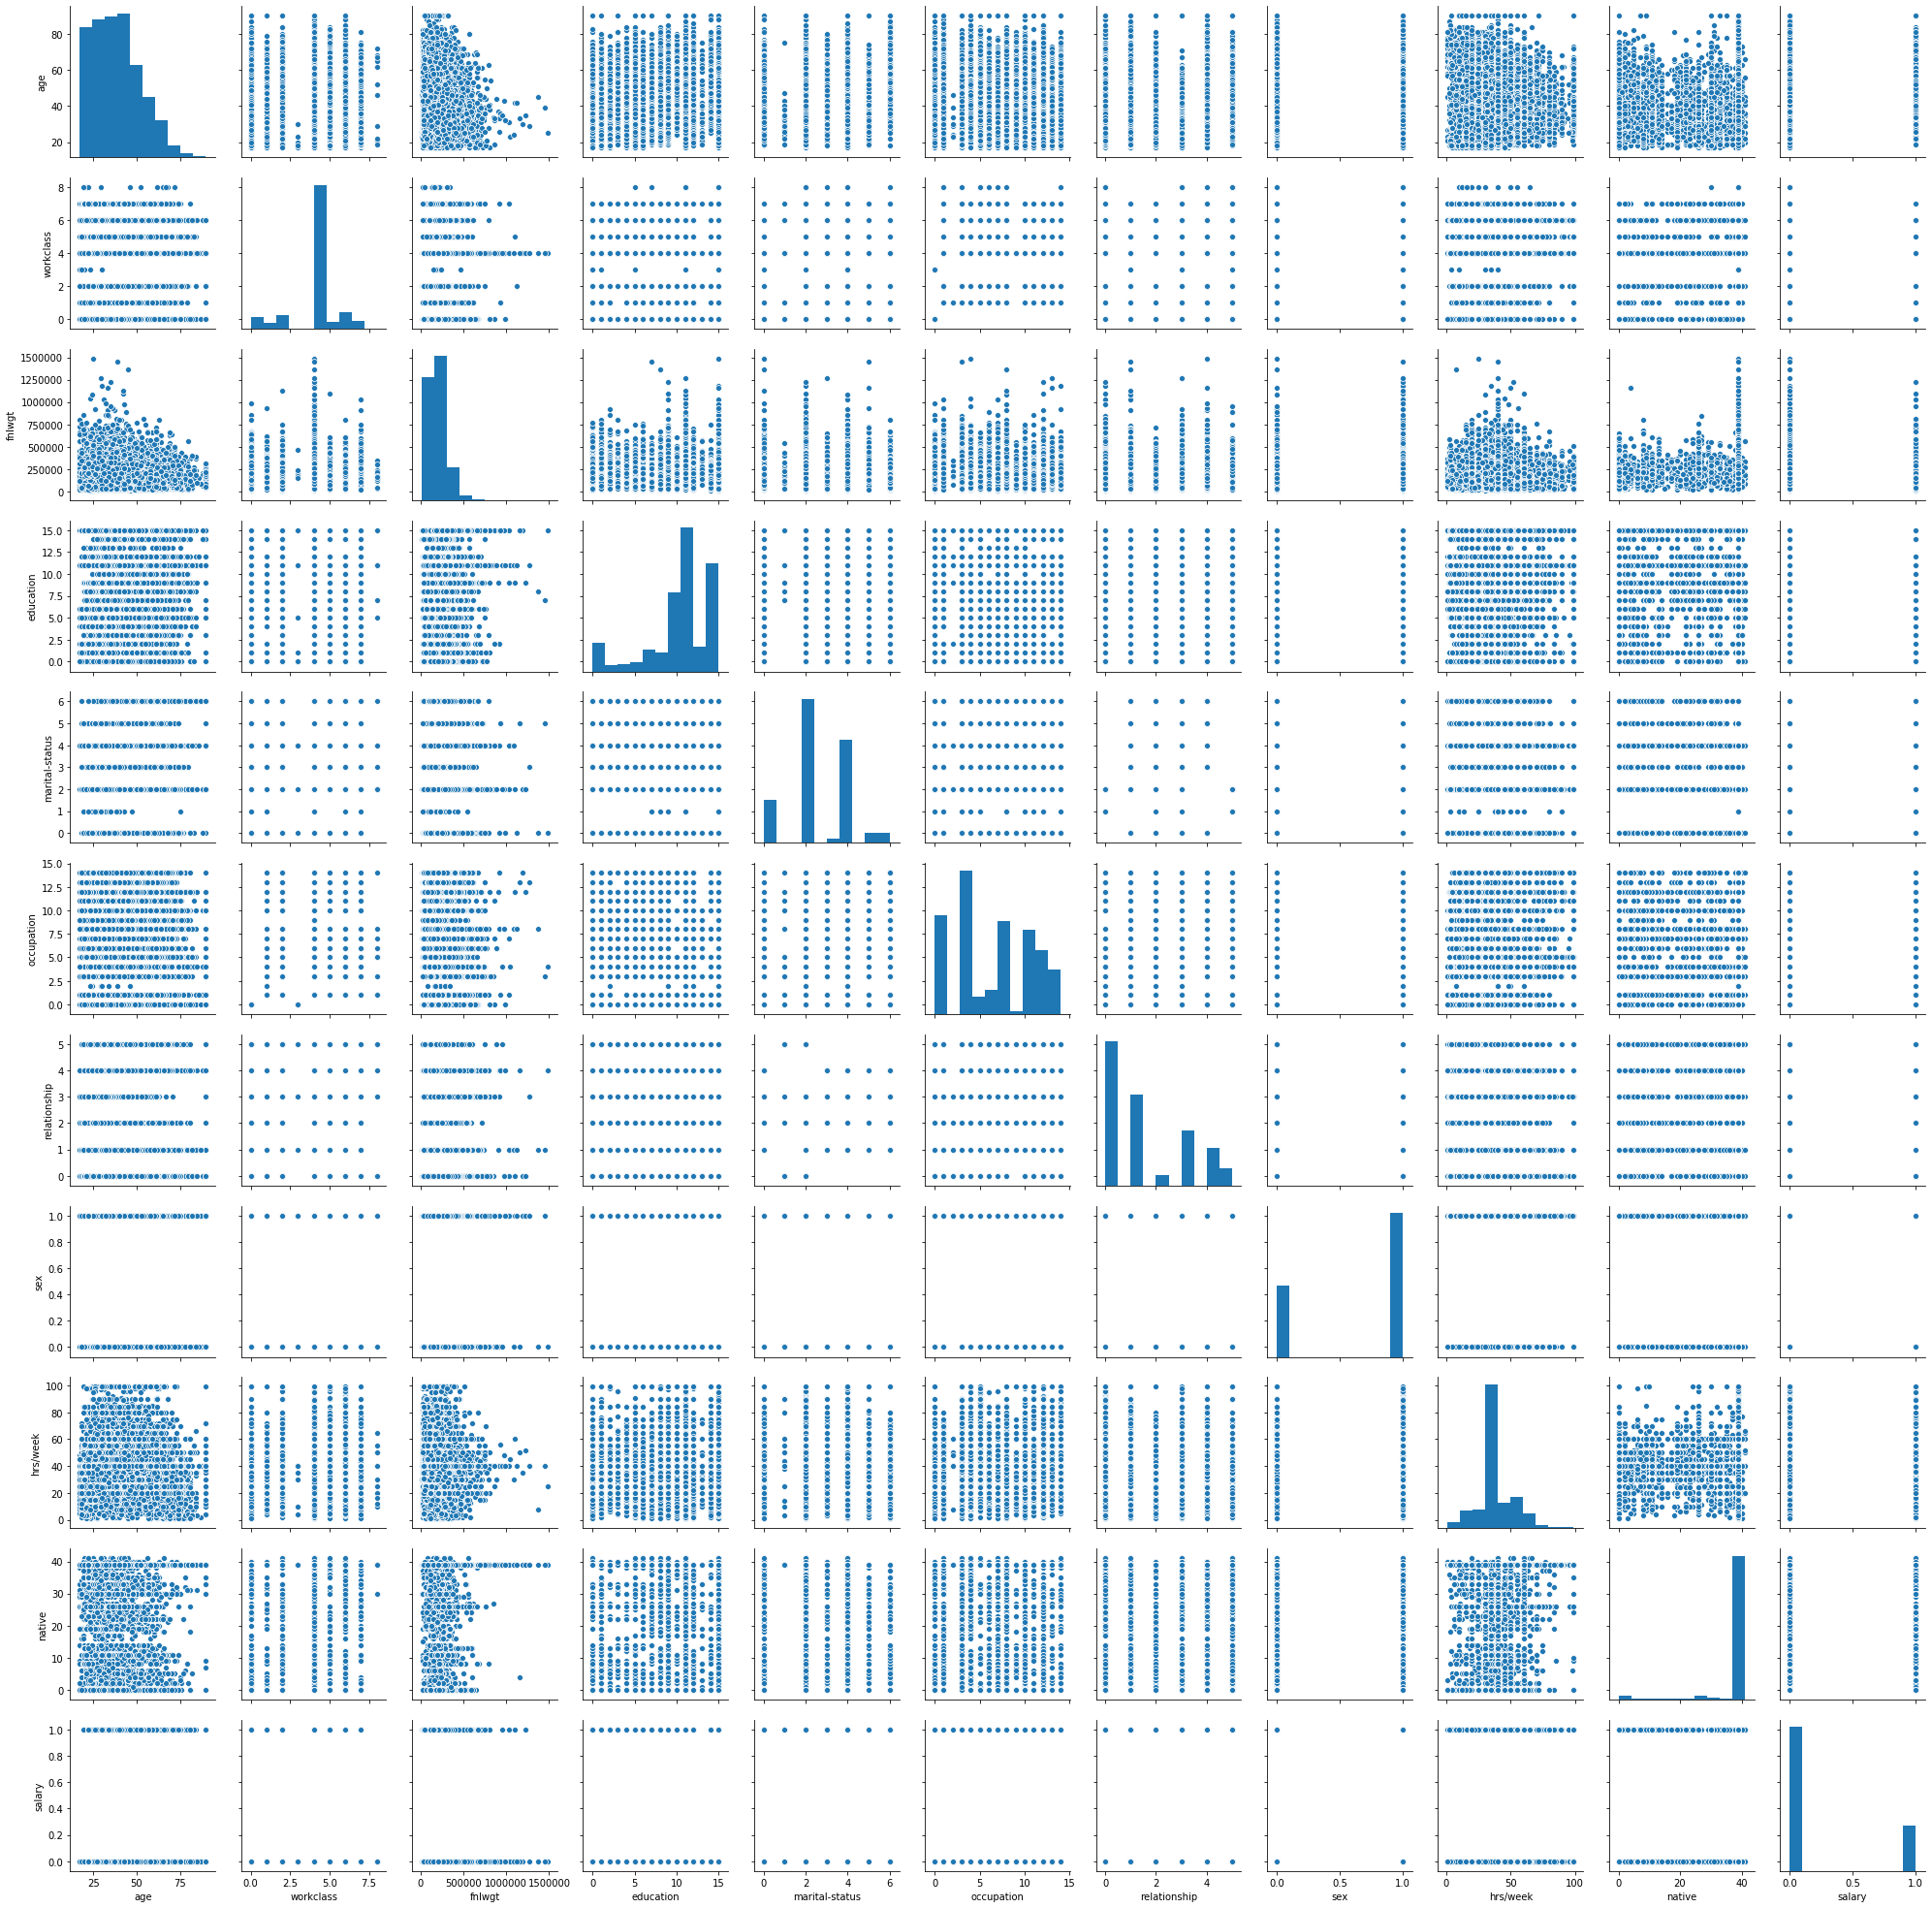

In [13]:
#plotting pairplot for the dataset
sns.pairplot(sal)

Correlation among all features with each other

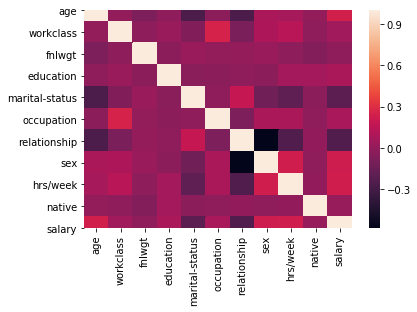

In [14]:
#getting correlation of data using heamap
salcor=sal.corr()
sns.heatmap(salcor)

In [15]:
#getting the structural view of the data
sal.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,hrs/week,native,salary
0,39,7,77516,9,4,1,1,1,40,39,0
1,50,6,83311,9,2,4,0,1,13,39,0
2,38,4,215646,11,0,6,1,1,40,39,0
3,53,4,234721,1,2,6,0,1,40,39,0
4,28,4,338409,9,2,10,5,0,40,5,0


Statistical summary of data

In [16]:
sal.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,hrs/week,native,salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,2.611836,6.572740,1.446362,0.669205,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,1.506222,4.228857,1.606771,0.470506,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,2.000000,7.000000,1.000000,1.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,4.000000,10.000000,3.000000,1.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,6.000000,14.000000,5.000000,1.000000,99.000000,41.000000,1.000000


Some outliers is present in some of the columns which results the mean,standard deviation and min-max diffrence.So at first need to handle them

Importing zscore to reduce the ouliers in the data

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(sal))
salnew=sal[(z<3).all(axis=1)]
salnew.shape

(30205, 11)

As,we see there is a diffrence of around 2000 rows after applying zscore,so taking new data after after applying zscore as final data

In [18]:
sal=salnew

Applying boxcox to some of the column having high outliers

In [19]:
#listing the particular columns and applying boxcox to it
l=['age','fnlwgt','hrs/week']
from scipy.stats import boxcox
for i in l:
    sal[i]=boxcox(sal[i],0)

Shaping the data to be ready for machine learning operations

In [20]:
#seperating input and target variables
x=sal.iloc[:,:-1]
y=sal.iloc[:,-1]

In [21]:
#checking for the skewness
x.skew()

age              -0.162296
workclass        -0.732829
fnlwgt           -0.945863
education        -0.950414
marital-status   -0.023521
occupation        0.123172
relationship      0.776827
sex              -0.709883
hrs/week         -2.260424
native           -4.723165
dtype: float64

In [22]:
#handling skew  in all columns
for col in x.columns:
    if x[col].skew()>0.55:
        x[col]=np.log1p(x[col])
    if x[col].skew()<-0.55:
        x[col]=np.square(x[col])

In [23]:
#creating function for detrmining  best random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [24]:
#creating function for algorithm operations and metrics
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [25]:
##Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false_Positive_rate')
    plt.ylabel('True positive rate')
    plt.title(alg)
    plt.show()
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_auc_score=',roc_score)

In [26]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

Now,lets apply the machine learning algorithm one by one

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
lr=LogisticRegression()
random(lr)

0.7784911717495987 at 75


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=75)
model(lr)

0.7784911717495987
[[7205  403]
 [1805  555]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7608
           1       0.58      0.24      0.33      2360

    accuracy                           0.78      9968
   macro avg       0.69      0.59      0.60      9968
weighted avg       0.75      0.78      0.74      9968



In [29]:
cross_val(lr)

[0.7633234  0.75169674 0.76195994 0.76560172 0.76208609]
0.760933579297794
0.004800077765359967


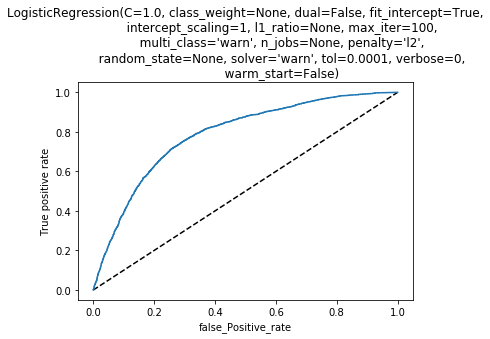

roc_auc_score= 0.5910994671086635


In [30]:
roc(lr)

Lasso

In [31]:
l=Lasso()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
g=GridSearchCV(estimator=l,param_grid=alphavalue)
g.fit(x_train,y_train)
g.best_params_

{'alpha': 0}

In [32]:
ls=Lasso(alpha=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.16567987632129344

Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.7803972712680578 at 76


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=76)
model(dtc)

0.7793940609951846
[[6422 1161]
 [1038 1347]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7583
           1       0.54      0.56      0.55      2385

    accuracy                           0.78      9968
   macro avg       0.70      0.71      0.70      9968
weighted avg       0.78      0.78      0.78      9968



In [35]:
cross_val(dtc)

[0.76994373 0.77354743 0.77172654 0.77007118 0.77268212]
0.7715941975961584
0.0014184372930809465


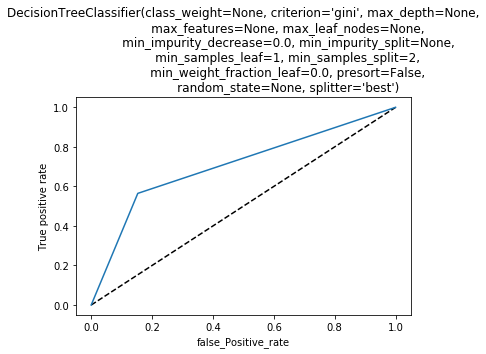

roc_auc_score= 0.7058371215985443


In [36]:
roc(dtc)

Naive bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.7579253611556982 at 80


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=80)
model(gnb)

0.7579253611556982
[[5833 1760]
 [ 653 1722]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      7593
           1       0.49      0.73      0.59      2375

    accuracy                           0.76      9968
   macro avg       0.70      0.75      0.71      9968
weighted avg       0.80      0.76      0.77      9968



In [39]:
cross_val(gnb)

[0.74859318 0.75202781 0.75004138 0.74755835 0.74917219]
0.7494785823209522
0.0015086688777707353


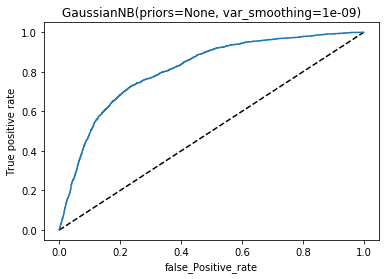

roc_auc_score= 0.7466300955866553


In [40]:
roc(gnb)

K-neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 16}

In [42]:
knn=KNeighborsClassifier(n_neighbors=16)
random(knn)

0.8080858747993579 at 80


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=80)
knn=KNeighborsClassifier(n_neighbors=16)
model(knn)

0.8080858747993579
[[7059  534]
 [1379  996]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7593
           1       0.65      0.42      0.51      2375

    accuracy                           0.81      9968
   macro avg       0.74      0.67      0.70      9968
weighted avg       0.79      0.81      0.79      9968



In [44]:
cross_val(knn)

[0.7979146  0.79755007 0.80483364 0.8023506  0.79221854]
0.7989734912744655
0.004347939598524435


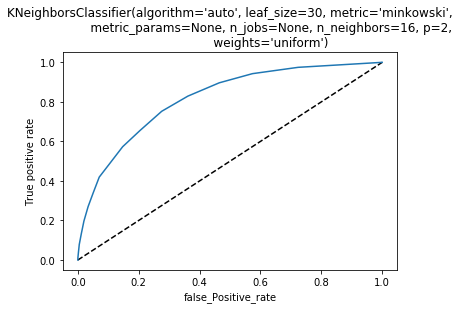

roc_auc_score= 0.6745202437147788


In [45]:
roc(knn)

After solving the above algorithms,we get the best accuracy_score of 0.80 at random_state from k-neighbors.So considering the K_neighbors as the final algorithm

In [46]:
#applying k neighbors algorithm 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=80)
knn=KNeighborsClassifier(n_neighbors=16)
model(knn)

0.8080858747993579
[[7059  534]
 [1379  996]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7593
           1       0.65      0.42      0.51      2375

    accuracy                           0.81      9968
   macro avg       0.74      0.67      0.70      9968
weighted avg       0.79      0.81      0.79      9968



In [47]:
cross_val(knn)

[0.7979146  0.79755007 0.80483364 0.8023506  0.79221854]
0.7989734912744655
0.004347939598524435


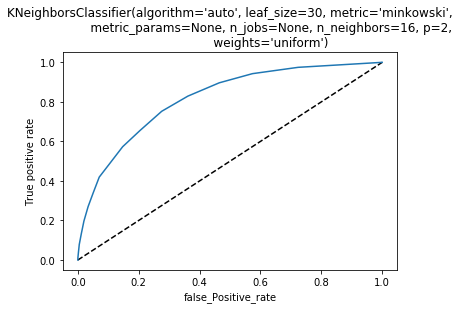

roc_auc_score= 0.6745202437147788


In [48]:
roc(knn)

In [49]:
#saving the model using joblib
from sklearn.externals import joblib
joblib.dump(knn,'knn_census.pkl')

['knn_census.pkl']

## Conclusion

In this project,after importing the data I check for the null values in the data and drop the columns that is not holding any neccesary data.I have used various plots to analyse the data insights from diffrent prospects.i have used describe function to get statistical summary.Removed the ouliers using zscore and boxcox.After processing the data,I have applied machine learning algorithms to get the best fit for the prediction of target variables.
K-neighbors algorithm gives the best score for this dataset